<a href="https://colab.research.google.com/github/TosinSDGs/TosinSDGs/blob/main/Cancer_Diagnosis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cancer Diagnosis Classification Project

In [ ]:
import pandas as pd
import matplotlib.pylab as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/careerera _2023/data/BreastCancer_data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
train=df.drop(["id"],axis=1)

In [ ]:
train["diagnosis"].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:

train.replace({"diagnosis":{"M":0,"B":1}},inplace=True)  #manual encoding


<Axes: xlabel='diagnosis', ylabel='count'>

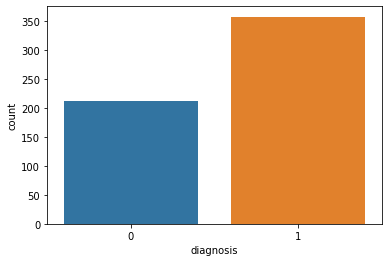

In [ ]:
import seaborn as sns
sns.countplot(data=train, x="diagnosis")


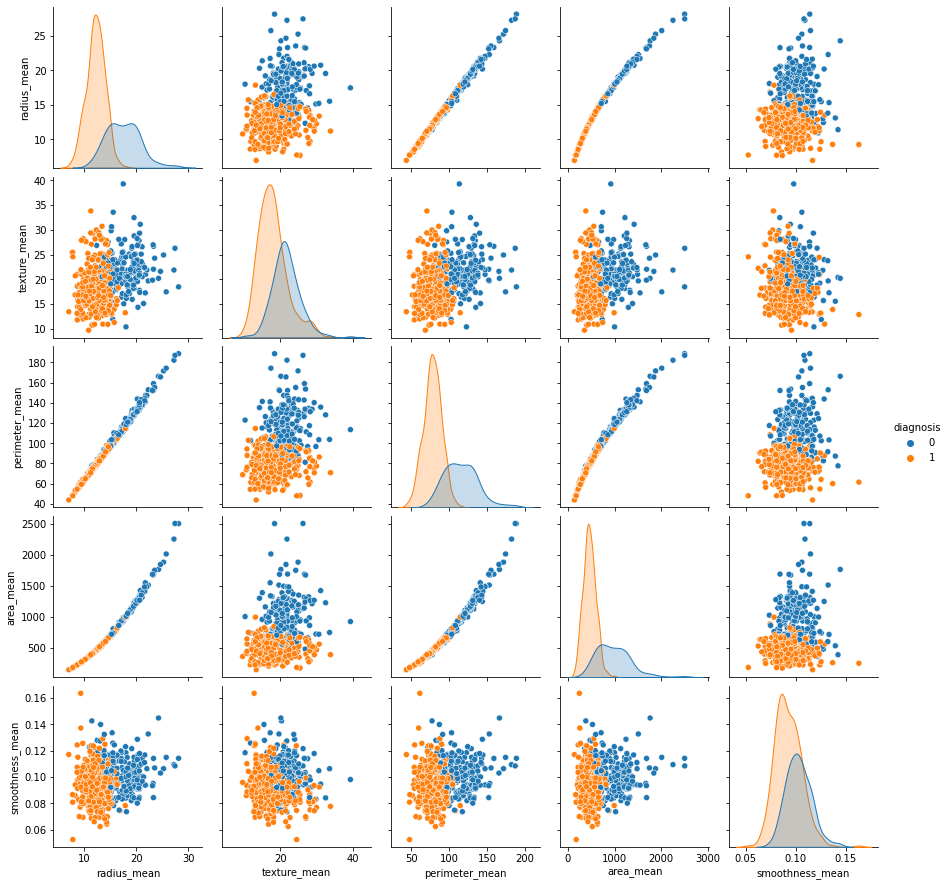

In [ ]:
sns.pairplot(data=train.iloc[:,0:6],hue="diagnosis")

In [ ]:
train.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872,NaN
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


<Axes: >

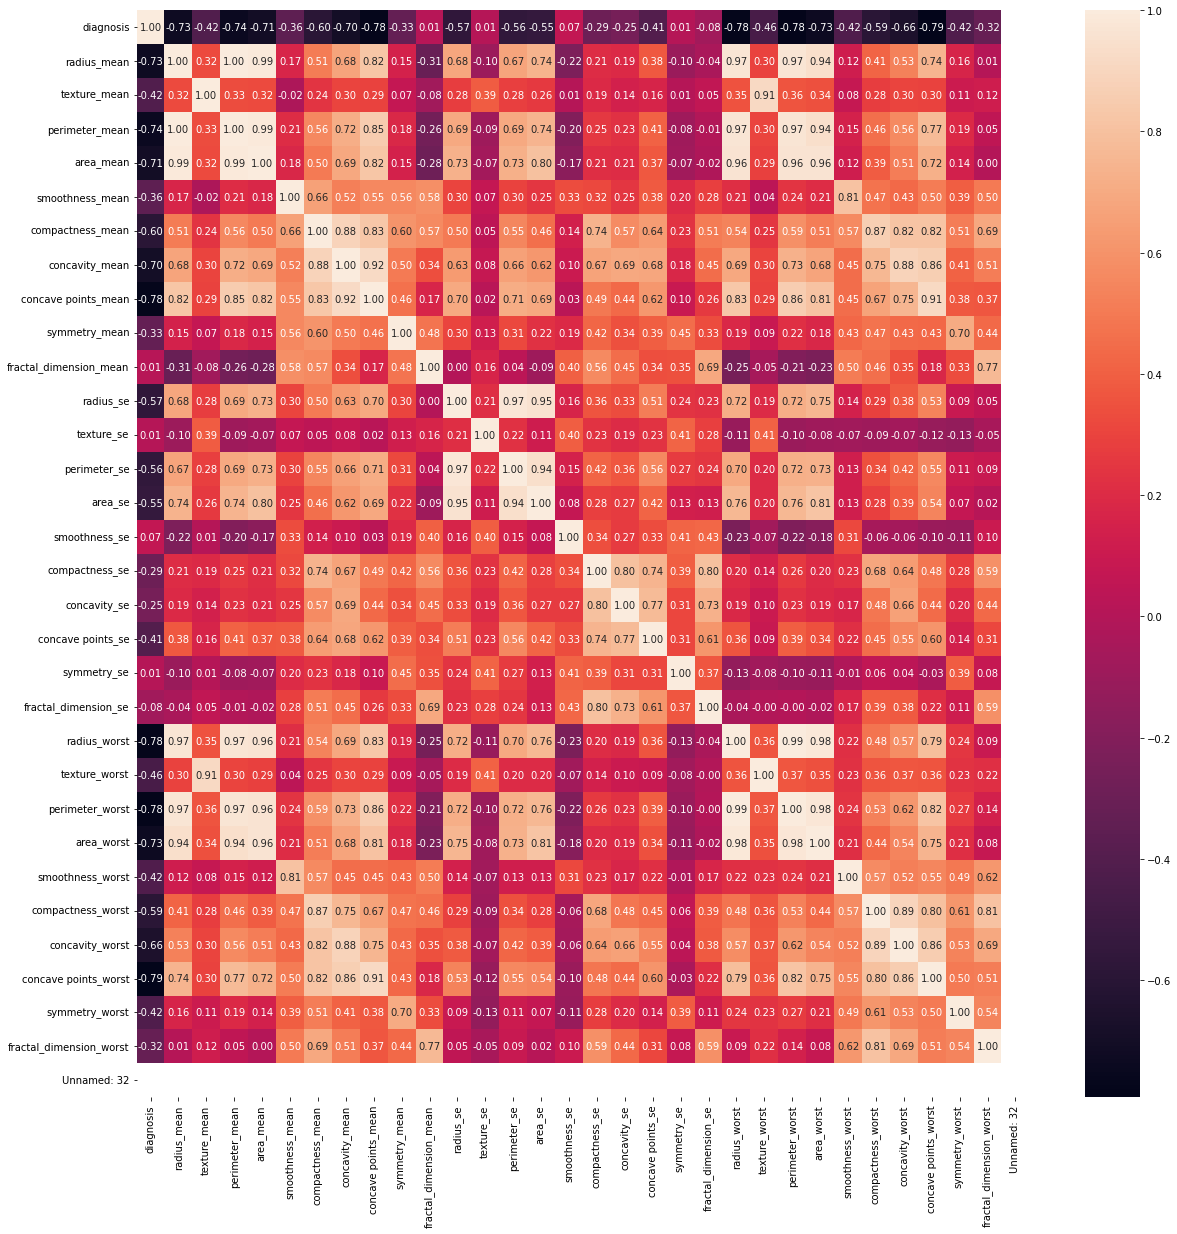

In [ ]:
f,ax=plt.subplots(figsize=(20,20))

sns.heatmap(train.corr(),annot=True,fmt='.2f')

In [ ]:
X=train.iloc[:,1:31].values

In [ ]:
Y=train.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg=LogisticRegression()

In [ ]:
logistic_reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print("logistic regression score",logistic_reg.score(X_train,y_train))

logistic regression score 0.9346733668341709


In [ ]:
print("decsion Tree score",tree.score(X_train,y_train))

decsion Tree score 1.0


In [ ]:
print("RandomForestClassifier score",forest.score(X_train,y_train))


RandomForestClassifier score 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

Y_predicted_value=tree.predict(X_test)
cm=confusion_matrix(y_test,Y_predicted_value)

TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]
(TP+TN)/(TP+TN+FP+FN)  # testing accuracy

0.9415204678362573

In [ ]:
cm

array([[ 59,   4],
       [  1, 107]])

In [ ]:

Y_predicted_value=logistic_reg.predict(X_test)
cm=confusion_matrix(y_test,Y_predicted_value)

TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]
(TP+TN)/(TP+TN+FP+FN)  # testing accuracy

0.9707602339181286

In [ ]:
Y_predicted_value=forest.predict(X_test)
cm=confusion_matrix(y_test,Y_predicted_value)

TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]
(TP+TN)/(TP+TN+FP+FN)  # testing accuracy

0.9649122807017544